In [69]:
import acquire as a
import prepare as p
from pprint import pprint
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import nltk
import re
import unicodedata
from nltk.corpus import stopwords
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from PIL import Image

In [ ]:
df = pd.read_csv('NLP_df.csv', index_col=0)

In [ ]:
df = df.reset_index(drop=True)

In [ ]:
df.shape

In [ ]:
df = df.drop_duplicates()

In [ ]:
javascript_words = p.basic_clean(' '.join(df[df.language == 'JavaScript'].readme_contents))
python_words = p.basic_clean(' '.join(df[df.language == 'Python'].readme_contents))
go_words = p.basic_clean(' '.join(df[df.language == 'Go'].readme_contents))
java_words = p.basic_clean(' '.join(df[df.language == 'Java'].readme_contents))

In [ ]:
stopword_list = stopwords.words('english')

In [ ]:
javascript_words = p.remove_stopwords(javascript_words)
javascript_words = p.remove_stopwords(javascript_words)

In [ ]:
language_words = [javascript_words, python_words, go_words, java_words]

In [ ]:
for i in language_words:
    i = p.remove_stopwords(i)

In [ ]:
df.shape

---

# Creating Acquire and Prep Files

In [3]:
# def get_github_data():
#     df = pd.read_csv('NLP_df.csv', index_col=0)
#     df = df.reset_index(drop=True)
#     return df 

In [2]:
df = a.get_github_data()
df

,repo,language,readme_contents
0,freeCodeCamp/freeCodeCamp,JavaScript,![freeCodeCamp.org Social Banner](https://s3.a...
1,vuejs/vue,JavaScript,"<p align=""center""><a href=""https://vuejs.org"" ..."
2,facebook/react,JavaScript,# [React](https://reactjs.org/) &middot; [![Gi...
3,twbs/bootstrap,JavaScript,"<p align=""center"">\n <a href=""https://getboot..."
4,public-apis/public-apis,Python,# Public APIs [![Run tests](https://github.com...
...,...,...,...
107,gogs/gogs,Go,"# <img src=""https://github.com/gogs/gogs/raw/m..."
108,nuxt/nuxt.js,JavaScript,"<p align=""center""><img align=""center"" style=""w..."
109,iptv-org/iptv,JavaScript,# IPTV\n\n![auto-update](https://github.com/ip...
110,mermaid-js/mermaid,JavaScript,# mermaid [![Build Status](https://travis-ci.o...


In [3]:
df = p.prep_github_data(df, 'readme_contents')

In [4]:
df

,repo,language,readme_contents,original,clean,stemmed,lemmatized
0,freeCodeCamp/freeCodeCamp,JavaScript,![freeCodeCamp.org Social Banner](https://s3.a...,![freeCodeCamp.org Social Banner](https://s3.a...,freecodecamporg social bannerhttpss3amazonawsc...,freecodecamporg social bannerhttpss3amazonawsc...,freecodecamporg social bannerhttpss3amazonawsc...
1,vuejs/vue,JavaScript,"<p align=""center""><a href=""https://vuejs.org"" ...","<p align=""center""><a href=""https://vuejs.org"" ...",p aligncentera hrefhttpsvuejsorg target_blank ...,p aligncentera hrefhttpsvuejsorg target_blank ...,p aligncentera hrefhttpsvuejsorg target_blank ...
2,facebook/react,JavaScript,# [React](https://reactjs.org/) &middot; [![Gi...,# [React](https://reactjs.org/) &middot; [![Gi...,reacthttpsreactjsorg middot github licensehttp...,reacthttpsreactjsorg middot github licensehttp...,reacthttpsreactjsorg middot github licensehttp...
3,twbs/bootstrap,JavaScript,"<p align=""center"">\n <a href=""https://getboot...","<p align=""center"">\n <a href=""https://getboot...",p aligncenter hrefhttpsgetbootstrapcom img src...,p aligncent hrefhttpsgetbootstrapcom img srcht...,p aligncenter hrefhttpsgetbootstrapcom img src...
4,public-apis/public-apis,Python,# Public APIs [![Run tests](https://github.com...,# Public APIs [![Run tests](https://github.com...,public apis run testshttpsgithubcompublicapisp...,public api run testshttpsgithubcompublicapispu...,public apis run testshttpsgithubcompublicapisp...
...,...,...,...,...,...,...,...
107,gogs/gogs,Go,"# <img src=""https://github.com/gogs/gogs/raw/m...","# <img src=""https://github.com/gogs/gogs/raw/m...",img srchttpsgithubcomgogsgogsrawmainpublicimgf...,img srchttpsgithubcomgogsgogsrawmainpublicimgf...,img srchttpsgithubcomgogsgogsrawmainpublicimgf...
108,nuxt/nuxt.js,JavaScript,"<p align=""center""><img align=""center"" style=""w...","<p align=""center""><img align=""center"" style=""w...",p aligncenterimg aligncenter stylewidth320px s...,p aligncenterimg aligncent stylewidth320px src...,p aligncenterimg aligncenter stylewidth320px s...
109,iptv-org/iptv,JavaScript,# IPTV\n\n![auto-update](https://github.com/ip...,# IPTV\n\n![auto-update](https://github.com/ip...,iptv autoupdatehttpsgithubcomiptvorgiptvaction...,iptv autoupdatehttpsgithubcomiptvorgiptvaction...,iptv autoupdatehttpsgithubcomiptvorgiptvaction...
110,mermaid-js/mermaid,JavaScript,# mermaid [![Build Status](https://travis-ci.o...,# mermaid [![Build Status](https://travis-ci.o...,mermaid build statushttpstravisciorgmermaidjsm...,mermaid build statushttpstravisciorgmermaidjsm...,mermaid build statushttpstravisciorgmermaidjsm...


In [5]:
#not sure if I should stem or lemmatize yet
javascript_words = ' '.join(df[df.language == 'JavaScript'].clean)
python_words = ' '.join(df[df.language == 'Python'].clean)
java_words = ' '.join(df[df.language == 'Java'].clean)
go_words = ' '.join(df[df.language == 'Go'].clean)
all_words = ' '.join(df.clean)

In [6]:
javascript_freq = pd.Series(javascript_words.split()).value_counts()
python_freq = pd.Series(python_words.split()).value_counts()
java_freq = pd.Series(java_words.split()).value_counts()
go_freq = pd.Series(go_words.split()).value_counts()
all_freq = pd.Series(all_words.split()).value_counts()

In [22]:
word_counts = pd.concat([javascript_freq, python_freq, java_freq, go_freq, all_freq], axis=1).fillna(0).astype(int)
word_counts.columns = ['javascript', 'python','java','go','all']
word_counts.head()

,javascript,python,java,go,all
source,943,74,37,60,1114
javascript,821,43,2,5,871
&#9;,730,4,23,1282,2039
icon,433,1,1,2,437
const,415,0,0,1,416


In [23]:
word_counts.sort_values('all', ascending=False).head(10)

,javascript,python,java,go,all
&#9;,730,4,23,1282,2039
go,135,54,2,1121,1312
source,943,74,37,60,1114
yes,3,1022,0,0,1025
javascript,821,43,2,5,871
library,46,392,30,360,828
data,174,516,26,107,823
python,163,629,8,6,806
use,292,219,32,110,653
unknown,0,626,0,2,628


Text(0.5, 0, '\nFrequency')

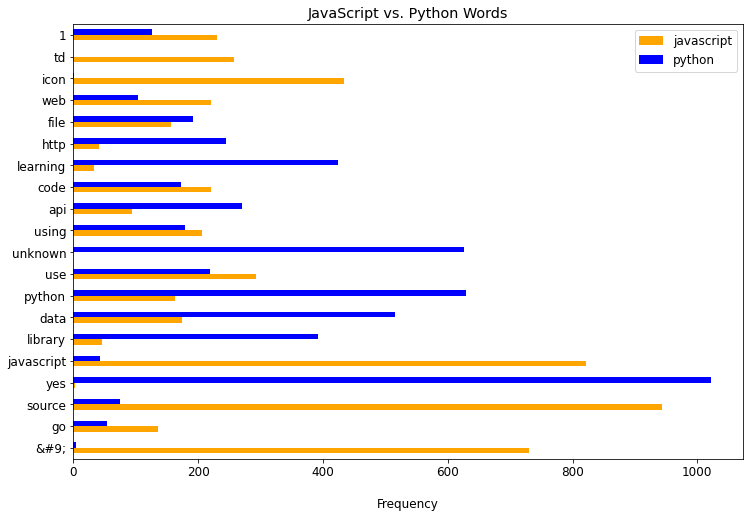

In [35]:
plt.rc('font', size=12)
word_counts.sort_values('all', ascending=False).head(20)[['javascript', 'python']].plot.barh(figsize=(12,8), color={"python": "blue", "javascript": "orange"})
plt.title('JavaScript vs. Python Words')
plt.xlabel('\nFrequency')

Text(0.5, 0, '\nFrequency')

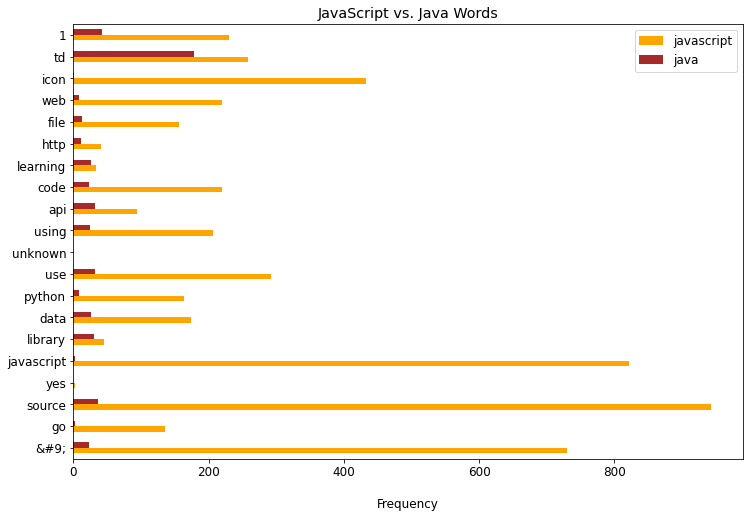

In [38]:
plt.rc('font', size=12)
word_counts.sort_values('all', ascending=False).head(20)[['javascript', 'java']].plot.barh(figsize=(12,8), color={"java": "brown", "javascript": "orange"})
plt.title('JavaScript vs. Java Words')
plt.xlabel('\nFrequency')

Text(0.5, 0, '\nFrequency')

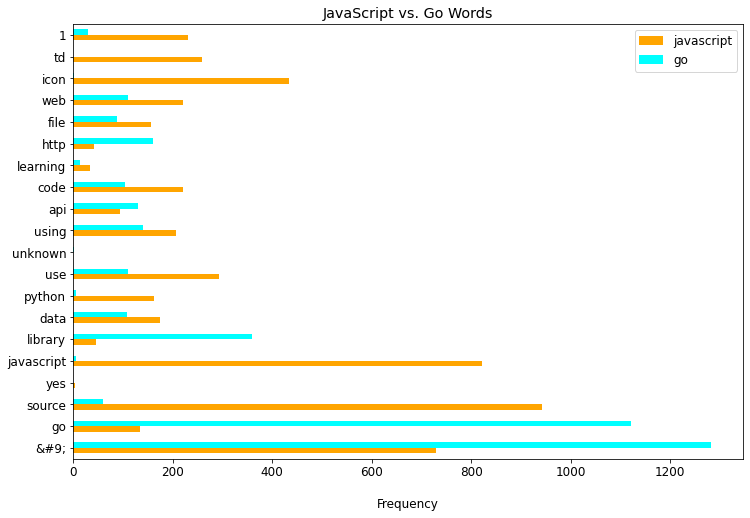

In [40]:
plt.rc('font', size=12)
word_counts.sort_values('all', ascending=False).head(20)[['javascript', 'go']].plot.barh(figsize=(12,8), color={"go": "aqua", "javascript": "orange"})
plt.title('JavaScript vs. Go Words')
plt.xlabel('\nFrequency')

In [44]:
def javascript_barh():
    plt.rc('font', size=12)
    word_counts.sort_values('all', ascending=False).head(20)[['javascript', 'python']].plot.barh(figsize=(12,8), color={"python": "blue", "javascript": "orange"})
    plt.title('JavaScript vs. Python Words')
    plt.xlabel('\nFrequency')
    plt.show()

    plt.rc('font', size=12)
    word_counts.sort_values('all', ascending=False).head(20)[['javascript', 'java']].plot.barh(figsize=(12,8), color={"java": "brown", "javascript": "orange"})
    plt.title('JavaScript vs. Java Words')
    plt.xlabel('\nFrequency')
    plt.show()
    
    plt.rc('font', size=12)
    word_counts.sort_values('all', ascending=False).head(20)[['javascript', 'go']].plot.barh(figsize=(12,8), color={"go": "aqua", "javascript": "orange"})
    plt.title('JavaScript vs. Go Words')
    plt.xlabel('\nFrequency')
    plt.show()

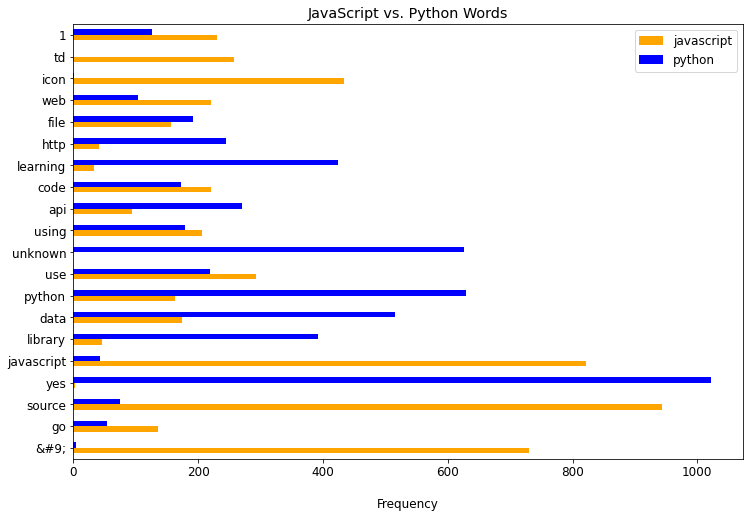

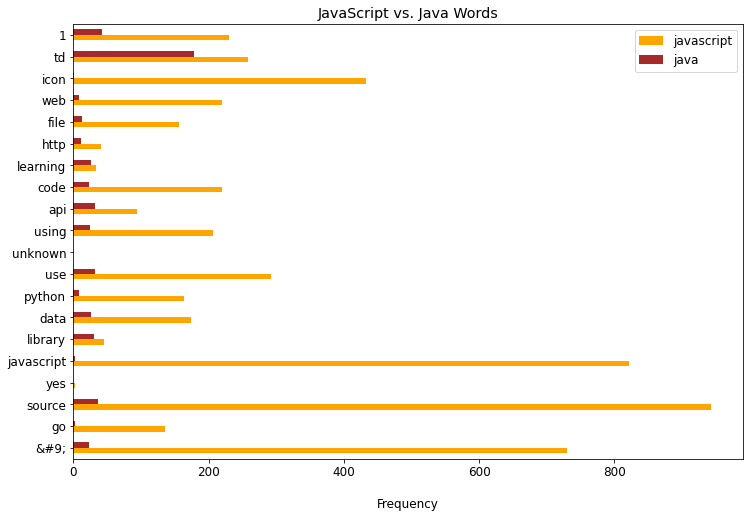

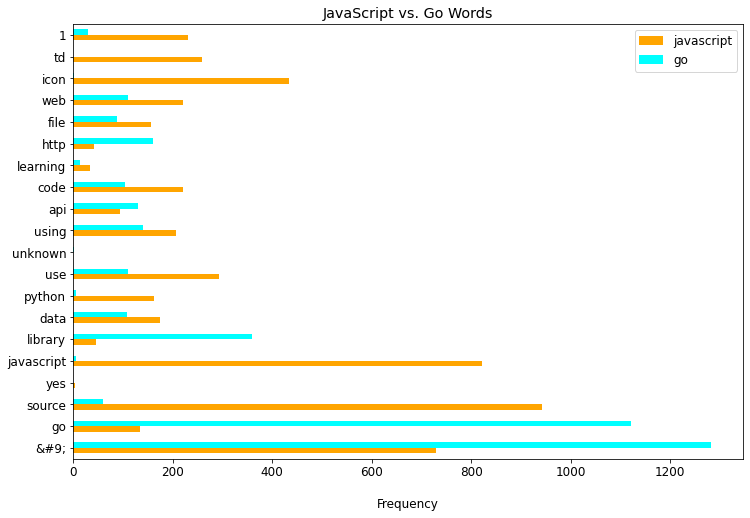

In [45]:
javascript_barh()

In [49]:
def python_barh():
    plt.rc('font', size=12)
    word_counts.sort_values('all', ascending=False).head(20)[['javascript', 'python']].plot.barh(figsize=(12,8), color={"python": "blue", "javascript": "orange"})
    plt.title('JavaScript vs. Python Words')
    plt.xlabel('\nFrequency')
    plt.show()

    plt.rc('font', size=12)
    word_counts.sort_values('all', ascending=False).head(20)[['python', 'java']].plot.barh(figsize=(12,8), color={"java": "brown", "python": "blue"})
    plt.title('Python vs. Java Words')
    plt.xlabel('\nFrequency')
    plt.show()
    
    plt.rc('font', size=12)
    word_counts.sort_values('all', ascending=False).head(20)[['python', 'go']].plot.barh(figsize=(12,8), color={"go": "aqua", "python": "blue"})
    plt.title('Python vs. Go Words')
    plt.xlabel('\nFrequency')
    plt.show()

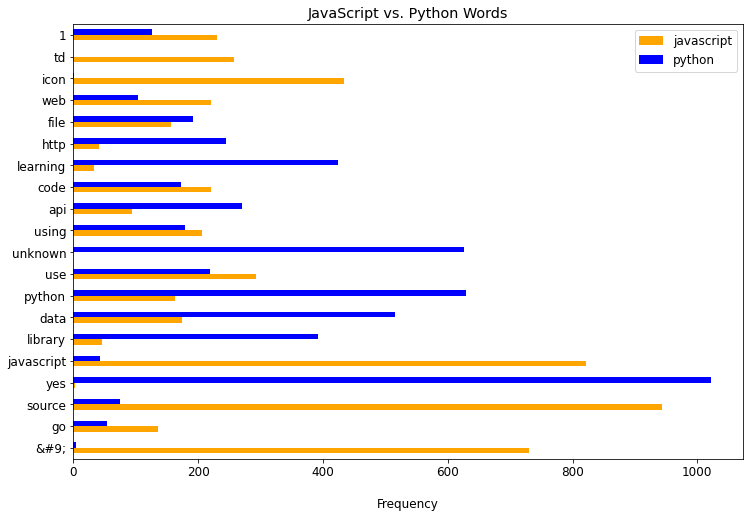

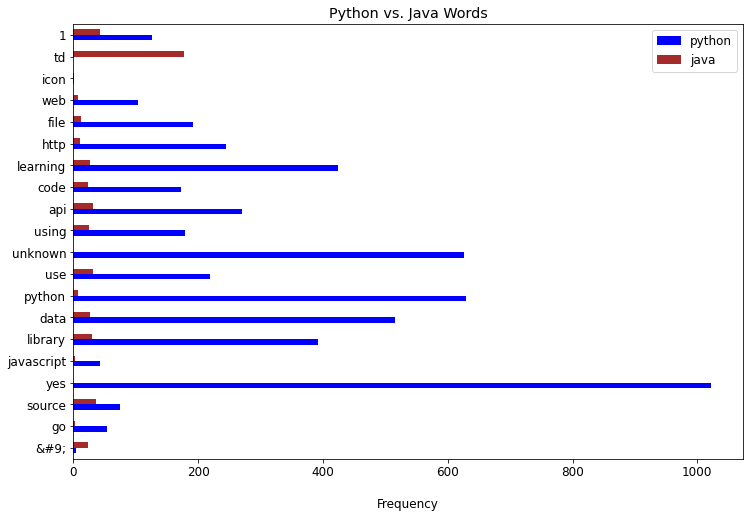

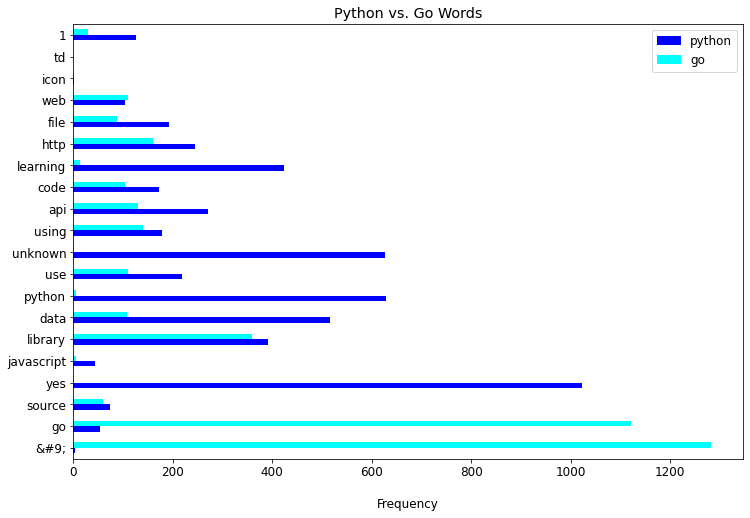

In [50]:
python_barh()

<Figure size 1152x720 with 0 Axes>

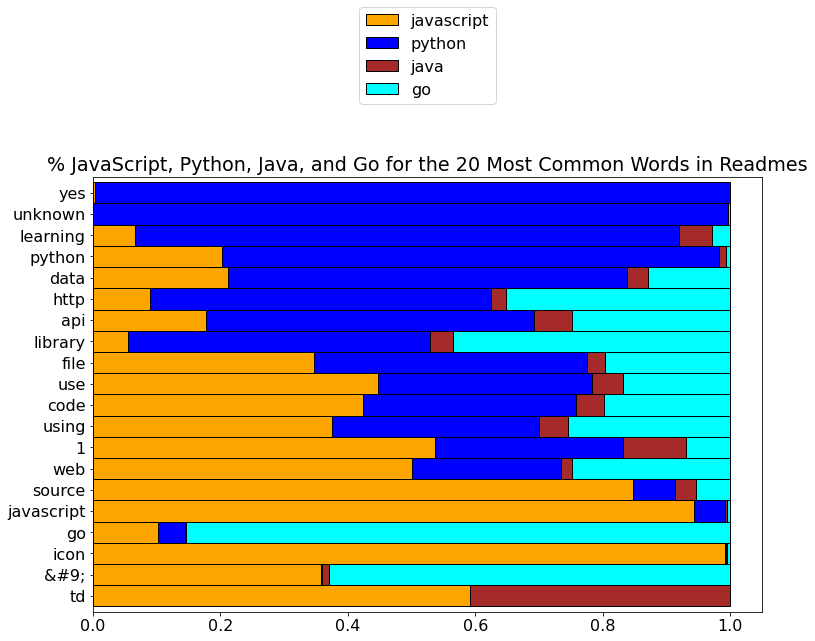

In [62]:
plt.figure(figsize=(16, 10))
plt.rc('font', size=16)
# axis=1 in .apply means row by row
(word_counts.sort_values(by='all', ascending=False)
 .head(20)
 .apply(lambda row: row / row['all'], axis=1)
 .drop(columns='all')
 .sort_values(by='python')
 .plot.barh(stacked=True, width=1, ec='black', figsize=(12,8), color={"go": "aqua", "python": "blue", "javascript": "orange", "java":"brown"}))
plt.title('% JavaScript, Python, Java, and Go for the 20 Most Common Words in Readmes')
plt.legend(loc="lower center", bbox_to_anchor=(0.5, 1.15))
#plt.gca().xaxis.set_major_formatter(plt.ticker.FuncFormatter('{:.0%}'.format))

(-0.5, 999.5, 599.5, -0.5)

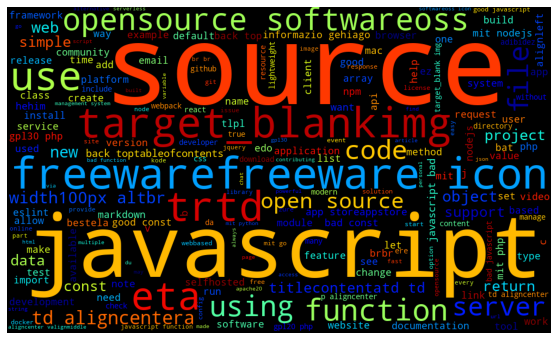

In [84]:
img = WordCloud(background_color='black', colormap = 'jet', width=1000, height=600).generate(javascript_words)
plt.figure(figsize=(12,6))
plt.imshow(img)
plt.axis('off')

In [106]:
def simple_wordcloud(language):
    img = WordCloud(background_color='black', colormap = 'jet', width=800, height=600).generate(language)
    plt.figure(figsize=(12,6))
    plt.imshow(img)
    plt.axis('off')
    plt.show()

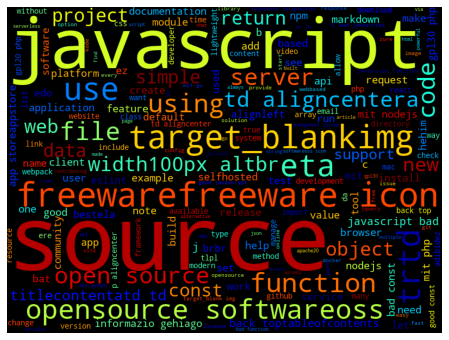

In [107]:
simple_wordcloud(javascript_words)

In [108]:
language_words = [javascript_words,python_words,java_words,go_words]

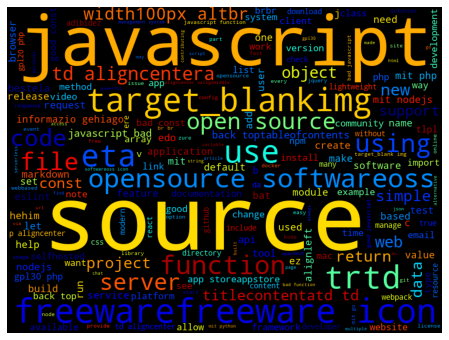

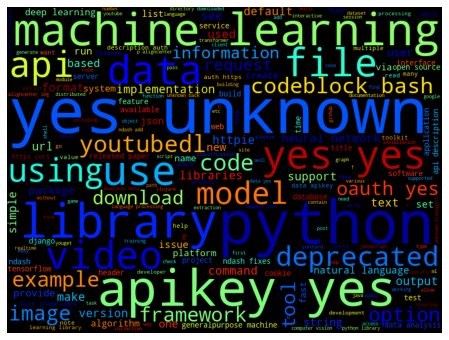

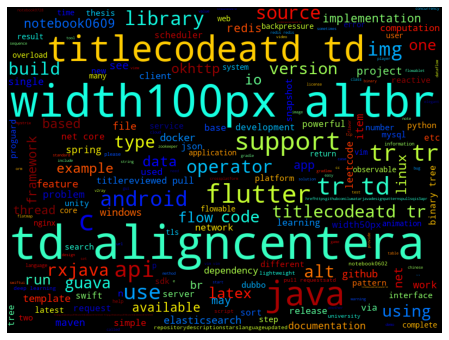

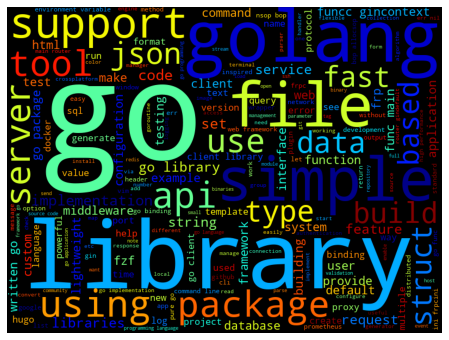

In [110]:
for i in language_words:
    simple_wordcloud(i)
    print('\n')

In [ ]:
# def prep_github_data(df):
#     df = df.drop_duplicates() 

    
#     javascript_words = basic_clean(' '.join(df[df.language == 'JavaScript'].readme_contents))
#     python_words = basic_clean(' '.join(df[df.language == 'Python'].readme_contents))
#     java_words = basic_clean(' '.join(df[df.language == 'Java'].readme_contents))
#     go_words = basic_clean(' '.join(df[df.language == 'Go'].readme_contents))
    
#     language_words = [javascript_words, python_words, go_words, java_words]
    
#     for i in language_words:
#         i = p.remove_stopwords(i)
        
#         return javascript_words, python_words, java_words, go_words

In [4]:
# extra_words = []
# exclude_words = []

In [5]:
# df = df['readme_contents'].apply(p.basic_clean)\
#                     .apply(p.tokenize)\
#                     .apply(lambda x: p.remove_stopwords(x, extra_words, exclude_words))

In [37]:
javascript_words = p.basic_clean(' '.join(df[df.language == 'JavaScript'].readme_contents))

In [30]:
javascript_words = p.tokenize(javascript_words)

In [38]:
javascript_words = p.remove_stopwords(javascript_words)

In [39]:
pd.Series(javascript_words.split()).value_counts()

source                               947
javascript                           827
icon                                 433
const                                430
freewarefreeware                     395
                                    ... 
pagekitehttpspagekitenet               1
alignleftnbspghanatdtd                 1
texthttpwwwsublimetextcom3             1
roomhttpsgitterimwebpackwebpack        1
maskhttpsgithubcom2ndalphagasmask      1
Length: 23400, dtype: int64

In [6]:
python_words = p.basic_clean(' '.join(df[df.language == 'Python'].readme_contents))

In [7]:
python_words = p.remove_stopwords(python_words)

In [ ]:
javascript_words = p.tokenize(javascript_words)

In [8]:
pd.Series(python_words.split()).value_counts()

yes                                               1022
python                                             627
unknown                                            626
data                                               515
learning                                           424
                                                  ... 
visualizationjavadataanalysisdatavisualization       1
wmagnus                                              1
pythontimblhttpsgithubcomproyconpythontimbl          1
portugues                                            1
09                                                   1
Length: 14072, dtype: int64

In [10]:
java_words = p.basic_clean(' '.join(df[df.language == 'Java'].readme_contents))

In [11]:
java_words = p.remove_stopwords(java_words)

In [12]:
pd.Series(java_words.split()).value_counts()

td                                                                    182
aligncentera                                                          172
altbr                                                                 172
width100px                                                            172
titlecodeatd                                                          127
                                                                     ... 
9pujiaxin33jxsegmentedviewhttpsgithubcompujiaxin33jxsegmentedviewa      1
axios                                                                   1
904c0203                                                                1
srchttpsavatars1githubusercontentcomu12736734v4s100                     1
denze                                                                   1
Length: 7220, dtype: int64

In [13]:
go_words = p.basic_clean(' '.join(df[df.language == 'Go'].readme_contents))

In [14]:
go_words = p.remove_stopwords(go_words)

In [15]:
pd.Series(go_words.split()).value_counts()

go                                                1120
library                                            360
golang                                             218
package                                            188
simple                                             173
                                                  ... 
19216812                                             1
default_bits                                         1
bindmethod                                           1
configurohttpsgithubcomsherifabdlnabyconfiguro       1
htmlindextmplnil                                     1
Length: 9236, dtype: int64

In [19]:
all_words = p.basic_clean(' '.join(df.readme_contents))

In [20]:
all_words = p.remove_stopwords(all_words)

In [21]:
pd.Series(all_words.split()).value_counts()

go                                                          1312
source                                                      1117
yes                                                         1025
javascript                                                   877
data                                                         829
                                                            ... 
thematic                                                       1
xsrvhttpsxsrvreadthedocsio                                     1
45nilaodabbdownhttpsgithubcomnilaodabbdownbilibili             1
nowrapcodehttpsiptvorggithubioiptvcountriesmtm3ucodetdtr       1
binarywiki                                                     1
Length: 45127, dtype: int64

In [42]:
pd.Series(nltk.bigrams(javascript_words.split())).value_counts()

(freewarefreeware, icon)     364
(opensource, softwareoss)    234
(open, source)               166
(td, aligncentera)           151
(width100px, altbr)          151
                            ... 
(erregistroren, bat)           1
(rename, new)                  1
(technologies, therefore)      1
(legacy, front)                1
(upon, guidelines)             1
Length: 60925, dtype: int64

In [43]:
pd.Series(nltk.bigrams(python_words.split())).value_counts()

(yes, unknown)         536
(apikey, yes)          319
(machine, learning)    276
(yes, yes)             213
(codeblock, bash)      132
                      ... 
(convert, curl)          1
(use, part)              1
(kb, 20)                 1
(net, framework)         1
(name, also)             1
Length: 40791, dtype: int64

In [44]:
pd.Series(nltk.bigrams(java_words.split())).value_counts()

(width100px, altbr)      172
(td, aligncentera)       172
(titlecodeatd, td)       100
(tr, td)                  45
(tr, tr)                  42
                        ... 
(player, application)      1
(schedulers, rxjava)       1
(left, towards)            1
(283, movezeroes)          1
(features, added)          1
Length: 11518, dtype: int64

In [45]:
pd.Series(nltk.bigrams(go_words.split())).value_counts()

(go, library)                                    66
(funcc, gincontext)                              62
(written, go)                                    56
(go, package)                                    55
(func, main)                                     51
                                                 ..
(materialized, path)                              1
(storing, resizing)                               1
(gologhttpsgithubcommlimaloureirogolog, easy)     1
(georeplicated, transactional)                    1
(inside, use)                                     1
Length: 24748, dtype: int64

In [49]:
javascript_freq = pd.Series(javascript_words.split()).value_counts()
python_freq = pd.Series(python_words.split()).value_counts()
java_freq = pd.Series(java_words.split()).value_counts()
go_freq = pd.Series(go_words.split()).value_counts()

In [ ]:
plt.figure(figsize=(16, 9))
plt.rc('font', size=16)
# axis=1 in .apply means row by row
(word_counts.sort_values(by='all', ascending=False)
 .head(20)
 .apply(lambda row: row / row['all'], axis=1)
 .sort_values(by='javascript_words')
 .plot.barh(stacked=True, width=1, ec='black'))
plt.title('% of spam vs ham for the most common 20 words')

plt.gca().xaxis.set_major_formatter(mpl.ticker.FuncFormatter('{:.0%}'.format))